### 任务描述

理解前向逐步线性回归的基本概念，掌握前向逐步的算法原理，最终能够实现前向逐步线性回归。

### 相关知识

**基本概念**

前向逐步线性回归算法属于一种贪心算法，即每一步都尽可能减少误差。我们计算回归系数，不再是通过公式计算，而是通过每次微调各个回归系数，然后计算预测误差。那个使误差最小的一组回归系数，就是我们需要的最佳回归系数。

**基本原理**

（1）在特征较多时，我们面临降低维度分析的问题，也就是统计学中的缩减，去掉不重要的参数，对数据进行降维，根据在特定领域中的知识或是理论假设，选择其中一些可能更有意义的变量进行后续分析。但不是任何情况下我们都掌握这些先验信息，所以基于数据本身的特征提取方法应运而生。

（2）在 stepwise regression 中，提取哪些变量主要基于的假设是：在线性条件下，哪些变量组合能够解释更多的因变量变异，则将其保留。也就是那些参数的变化会更严重的影响到因变量（这些参数对因变量是主要影响因素）

（3）逐步线性回归优点：构建一个模型后，利用本算法找出重要的特征，及时停止对不重要特征的收集

**前向逐步算法原理分析**

该算法使用两层循环，第一层是迭代次数，第二层是属性值。

**主要步骤：**

在每次迭代中，对每个属性值进行修改，然后使用修改后的属性值参数进行预测，通过计算差平方和，来判定修改是否有利于减少误差，再决定是否进行此次修改。

就这样一步一步的去减少误差，总的方向是向着减少误差的方向前进，所以该算法命名为前向逐步算法

**前向逐步线性回归实现**

**加载数据**

In [2]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
def loadDataSet(fileName):
    """
    函数说明:加载数据
    Parameters:
        fileName - 文件名
    Returns:
        xArr - x数据集
        yArr - y数据集
    """
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr

**数据标准化**

In [3]:
def regularize(xMat, yMat):
    """
    函数说明:数据标准化
    Parameters:
        xMat - x数据集
        yMat - y数据集
    Returns:
        inxMat - 标准化后的x数据集
        inyMat - 标准化后的y数据集
    """    
    inxMat = xMat.copy()                                                        #数据拷贝
    inyMat = yMat.copy()
    yMean = np.mean(yMat, 0)                                                    #行与行操作，求均值
    inyMat = yMat - yMean                                                        #数据减去均值
    inMeans = np.mean(inxMat, 0)                                                   #行与行操作，求均值
    inVar = np.var(inxMat, 0)                                                     #行与行操作，求方差
    inxMat = (inxMat - inMeans) / inVar                                            #数据减去均值除以方差实现标准化
    return inxMat, inyMat

**计算平方误差**

In [4]:
def rssError(yArr,yHatArr):
    """
    函数说明:计算平方误差
    Parameters:
        yArr - 预测值
        yHatArr - 真实值
    Returns:

    """
    return ((yArr-yHatArr)**2).sum()

**前向逐步线性回归**

In [5]:
def stageWise(xArr, yArr, eps = 0.01, numIt = 100):
    """
    函数说明:前向逐步线性回归
    Parameters:
        xArr - x输入数据
        yArr - y预测数据
        eps - 每次迭代需要调整的步长
        numIt - 迭代次数
    Returns:
        returnMat - numIt次迭代的回归系数矩阵
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T                                         #数据集
    xMat, yMat = regularize(xMat, yMat)                                                #数据标准化
    m, n = np.shape(xMat)
    returnMat = np.zeros((numIt, n))                                                #初始化numIt次迭代的回归系数矩阵
    ws = np.zeros((n, 1))                                                            #初始化回归系数矩阵
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):                                                            #迭代numIt次
        # print(ws.T)                                                                    #打印当前回归系数矩阵
        lowestError = float('inf');                                                 #正无穷
        for j in range(n):                                                            #遍历每个特征的回归系数
            for sign in [-1, 1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign                                                #微调回归系数
                yTest = xMat * wsTest                                                #计算预测值
                rssE = rssError(yMat.A, yTest.A)                                    #计算平方误差
                if rssE < lowestError:                                                #如果误差更小，则更新当前的最佳回归系数
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T                                                         #记录numIt次迭代的回归系数矩阵
    return returnMat

（1）函数的参数分别是 数据、真实值、步长、迭代次数

（2）我们对数据进行标准化，这里需要留意一下，我们之间大都是针对分类数据进行标准化，这次对于非分类数据集进行标准化时，输出值也需要进行变化。

（3）接下来是第一层循环，循环次数是迭代数

（4）然后是第二层循环，循环次数是属性值个数

（5）对于每个属性值，我们都对他进行添加一个步长或者减少一个步长，再判定是否有助于减小误差。

（6）若误差值相比上一次循环有所减小，则修改成功。否则不进行修改。

**绘制回归系数矩阵**

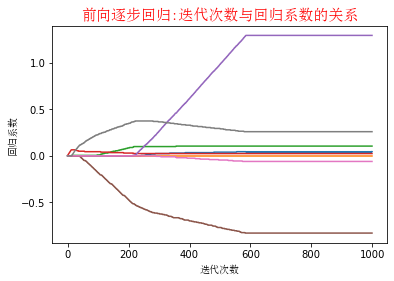

In [6]:
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    xArr, yArr = loadDataSet('abalone.txt')
    returnMat = stageWise(xArr, yArr, 0.005, 1000)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(returnMat)    
    ax_title_text = ax.set_title(u'前向逐步回归:迭代次数与回归系数的关系', FontProperties = font)
    ax_xlabel_text = ax.set_xlabel(u'迭代次数', FontProperties = font)
    ax_ylabel_text = ax.set_ylabel(u'回归系数', FontProperties = font)
    plt.setp(ax_title_text, size = 15, weight = 'bold', color = 'red')
    plt.setp(ax_xlabel_text, size = 10, weight = 'bold', color = 'black')
    plt.setp(ax_ylabel_text, size = 10, weight = 'bold', color = 'black')
    plt.show()
   

**总结**

缩减方法（逐步线性回归或岭回归），就是将一些系数缩减成很小的值或者直接缩减为0。这样做，就增大了模型的偏差（减少了一些特征的权重），通过把一些特征的回归系数缩减到0，同时也就减少了模型的复杂度。消除了多余的特征之后，模型更容易理解，同时也降低了预测误差。但是当缩减过于严厉的时候，就会出现过拟合的现象，即用训练集预测结果很好，用测试集预测就糟糕很多。

### 编程要求

复习前向逐步线性回归的算法原理，编程实现前向逐步线性回归。

### 参考答案

In [ ]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
def loadDataSet(fileName):
    """
    函数说明:加载数据
    Parameters:
        fileName - 文件名
    Returns:
        xArr - x数据集
        yArr - y数据集
    """
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr
def regularize(xMat, yMat):
    """
    函数说明:数据标准化
    Parameters:
        xMat - x数据集
        yMat - y数据集
    Returns:
        inxMat - 标准化后的x数据集
        inyMat - 标准化后的y数据集
    """    
    inxMat = xMat.copy()                                                        #数据拷贝
    inyMat = yMat.copy()
    yMean = np.mean(yMat, 0)                                                    #行与行操作，求均值
    inyMat = yMat - yMean                                                        #数据减去均值
    inMeans = np.mean(inxMat, 0)                                                   #行与行操作，求均值
    inVar = np.var(inxMat, 0)                                                     #行与行操作，求方差
    inxMat = (inxMat - inMeans) / inVar                                            #数据减去均值除以方差实现标准化
    return inxMat, inyMat

def rssError(yArr,yHatArr):
    """
    函数说明:计算平方误差
    Parameters:
        yArr - 预测值
        yHatArr - 真实值
    Returns:

    """
    return ((yArr-yHatArr)**2).sum()

def stageWise(xArr, yArr, eps = 0.01, numIt = 100):
    """
    函数说明:前向逐步线性回归
    Parameters:
        xArr - x输入数据
        yArr - y预测数据
        eps - 每次迭代需要调整的步长
        numIt - 迭代次数
    Returns:
        returnMat - numIt次迭代的回归系数矩阵
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T                                         #数据集
    xMat, yMat = regularize(xMat, yMat)                                                #数据标准化
    m, n = np.shape(xMat)
    returnMat = np.zeros((numIt, n))                                                #初始化numIt次迭代的回归系数矩阵
    ws = np.zeros((n, 1))                                                            #初始化回归系数矩阵
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):                                                            #迭代numIt次
        # print(ws.T)                                                                    #打印当前回归系数矩阵
        lowestError = float('inf');                                                 #正无穷
        for j in range(n):                                                            #遍历每个特征的回归系数
            for sign in [-1, 1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign                                                #微调回归系数
                yTest = xMat * wsTest                                                #计算预测值
                rssE = rssError(yMat.A, yTest.A)                                    #计算平方误差
                if rssE < lowestError:                                                #如果误差更小，则更新当前的最佳回归系数
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T                                                         #记录numIt次迭代的回归系数矩阵
    return returnMat
def plotstageWiseMat():
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    xArr, yArr = loadDataSet('abalone.txt')
    returnMat = stageWise(xArr, yArr, 0.005, 1000)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(returnMat)    
    ax_title_text = ax.set_title(u'前向逐步回归:迭代次数与回归系数的关系', FontProperties = font)
    ax_xlabel_text = ax.set_xlabel(u'迭代次数', FontProperties = font)
    ax_ylabel_text = ax.set_ylabel(u'回归系数', FontProperties = font)
    plt.setp(ax_title_text, size = 15, weight = 'bold', color = 'red')
    plt.setp(ax_xlabel_text, size = 10, weight = 'bold', color = 'black')
    plt.setp(ax_ylabel_text, size = 10, weight = 'bold', color = 'black')
    plt.show()
if __name__ == '__main__':
    plotstageWiseMat()   